In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import utils

In [40]:
games_dataset = pd.read_csv('vgsales.csv')
games_dataset.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [41]:
games_dataset.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [42]:
games_dataset.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [43]:
len(games_dataset.Publisher.unique())

579

<AxesSubplot: >

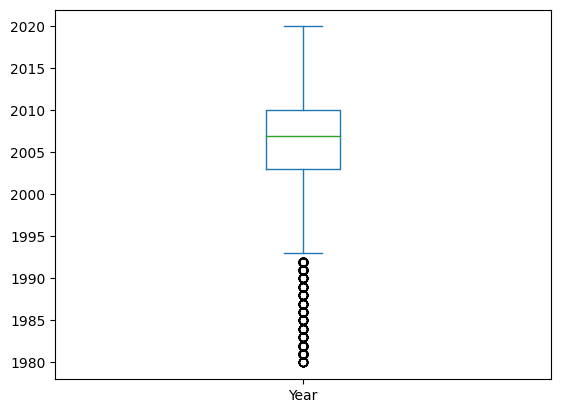

In [44]:
games_dataset['Year'].plot.box()


In [45]:
games_dataset.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


C:\Users\kryst\AppData\Local\Temp\ipykernel_6524\3919070972.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = games_dataset.corr()


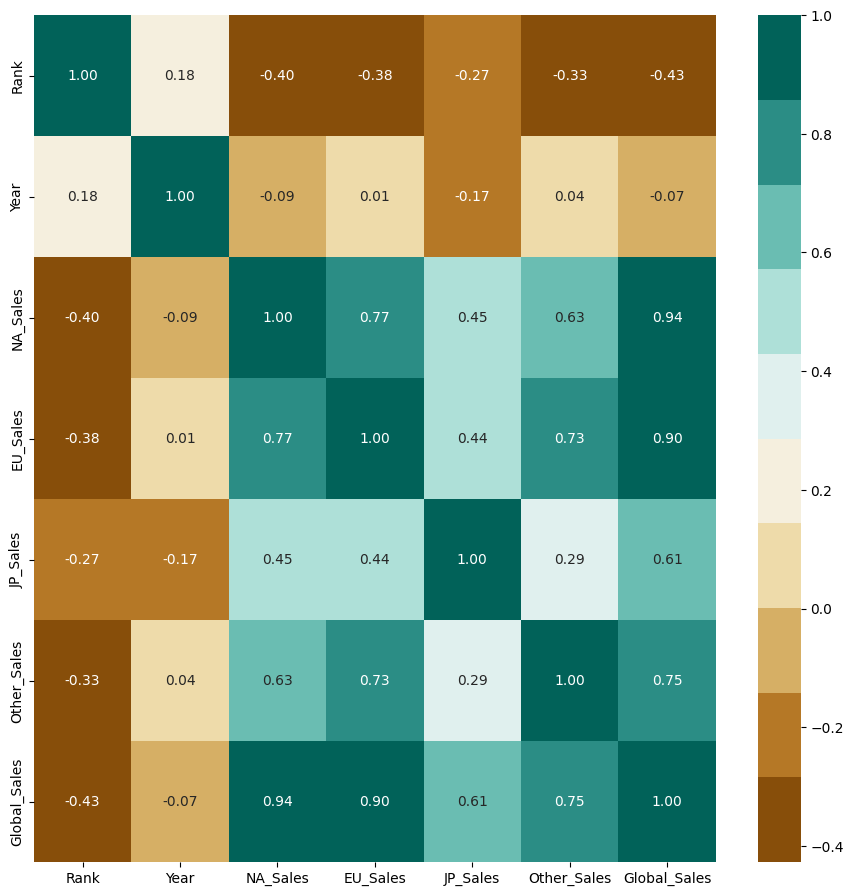

In [46]:
# Correlation before normalization

correlations = games_dataset.corr()
fig, ax = plt.subplots(figsize=(len(games_dataset.columns), len(games_dataset.columns)))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")

plt.show()

# Deleting unnecessary columns

In [47]:
games_dataset.drop('Name', inplace=True, axis=1)
games_dataset.drop('Rank', inplace=True, axis=1)
games_dataset.head(5)

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [48]:
# Dropping unnecessarily scarce data ( insignificant for model )

games_dataset = games_dataset.drop(games_dataset[games_dataset.Year < 1995].index)
games_dataset = games_dataset.drop(games_dataset[games_dataset.Year > 2019].index)

<AxesSubplot: >

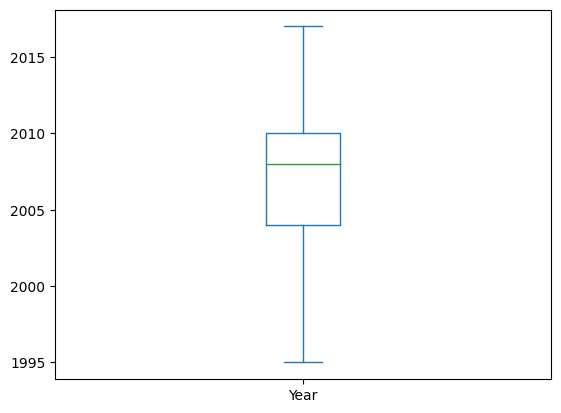

In [49]:
games_dataset['Year'].plot.box()

# Normalizing useful data to int types

In [50]:
# Dropping useless data

games_dataset.rename(columns = {'Platform':'Device'}, inplace = True)

games_dataset.drop('NA_Sales', inplace = True, axis = 1)
games_dataset.drop('EU_Sales', inplace = True, axis = 1)
games_dataset.drop('JP_Sales', inplace = True, axis = 1)
games_dataset.drop('Other_Sales', inplace = True, axis = 1)

In [ ]:
# Converts a column with multiple keyword existences to seperate binary columns
def one_hot_encoder(df, value_list, column_name):
    for value in value_list:
        df[value] = 0

    for i in range(len(df[column_name])):
        value = df[column_name].iloc[i]
        df[value].iloc[i] = 1

    df.drop(column_name, inplace = True, axis = 1)

one_hot_encoder(games_dataset, games_dataset['Genre'].unique(), 'Genre')
one_hot_encoder(games_dataset, games_dataset['Device'].unique(), 'Device')
one_hot_encoder(games_dataset, games_dataset['Publisher'].unique(), 'Publisher')

''' PCA for data reduction !!! '''

In [52]:
''' DON'T RUN TOO MANY COLUMNS '''

# correlations = games_dataset.corr()
# fig, ax = plt.subplots(figsize=(10, 10))

# colormap = sns.color_palette("BrBG", 10)

# sns.heatmap(correlations, 
#     cmap=colormap, 
#     annot=True, 
#     fmt=".2f")

# plt.show()

" DON'T RUN TOO MANY COLUMNS "

In [53]:
games_dataset.head(5)

,Year,Global_Sales,Sports,Racing,Role-Playing,Platform,Misc,Simulation,Action,Puzzle,...,Nitroplus,Paradox Development,Otomate,Ongakukan,Commseed,Inti Creates,Takuyo,Interchannel-Holon,Rain Games,UIG Entertainment
0,2006.0,82.74,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008.0,35.82,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009.0,33.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1996.0,31.37,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2006.0,30.01,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# Remove any Nan columns
games_dataset = games_dataset.loc[:, games_dataset.columns.notna()]
games_dataset = games_dataset.dropna()

In [55]:
x = games_dataset.drop('Global_Sales', axis=1).to_numpy()
y = games_dataset.loc[:, 'Global_Sales'].to_numpy()

In [56]:
# Scaling data
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.fit_transform(x)

In [57]:
pca = PCA()
pca.fit(x_scaled)

PCA()

Text(0, 0.5, 'Explained variance (%)')

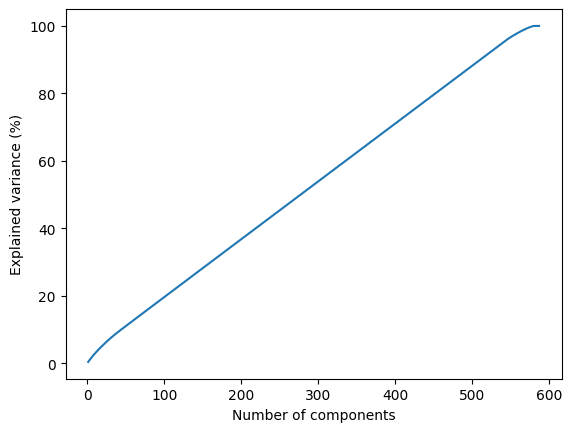

In [58]:
components = None
components = len(pca.explained_variance_ratio_) \
    if components is None else components

plt.plot(range(1, components+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [59]:
pca = PCA(n_components = 0.98)
pca.fit(x_scaled)

PCA(n_components=0.98)

In [ ]:
print(pca.explained_variance_ratio_.cumsum() * 100)

In [ ]:
x_pca = pca.transform(x_scaled)
print(x_pca.shape)
print(x_pca)

In [62]:
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LogisticRegression()
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [63]:
#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y = lab.fit_transform(y)

#view transformed values
print(y)

[595 594 593 ...   0   0   0]


In [64]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, shuffle=True, random_state=12345)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test,y_test)

c:\Users\kryst\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.0422979797979798

In [67]:
log_reg.predict([[3, 2019, 2, 1]])

ValueError: X has 4 features, but LogisticRegression is expecting 587 features as input.